In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../Data/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [4]:
pd.set_option('display.max_columns', None)
data.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [5]:
train_dummy_data=pd.get_dummies(data)

In [6]:
pd.set_option('display.max_rows', None)
corr_matrix=train_dummy_data.corr()
R_Matrix=corr_matrix['Response']
R_Matrix

Id                     0.000462
Product_Info_1         0.014692
Product_Info_3        -0.067432
Product_Info_4         0.202434
Product_Info_5        -0.001486
Product_Info_6        -0.030576
Product_Info_7        -0.004323
Ins_Age               -0.209610
Ht                    -0.093576
Wt                    -0.351395
BMI                   -0.381601
Employment_Info_1      0.040852
Employment_Info_2      0.078857
Employment_Info_3     -0.116408
Employment_Info_4     -0.024125
Employment_Info_5      0.054673
Employment_Info_6      0.017766
InsuredInfo_1          0.083729
InsuredInfo_2         -0.080783
InsuredInfo_3         -0.010344
InsuredInfo_4          0.022902
InsuredInfo_5         -0.096259
InsuredInfo_6          0.130476
InsuredInfo_7         -0.093927
Insurance_History_1    0.001245
Insurance_History_2   -0.122196
Insurance_History_3    0.007177
Insurance_History_4   -0.000047
Insurance_History_5    0.020420
Insurance_History_7   -0.006152
Insurance_History_8    0.007376
Insuranc

### Make a list of categories with less than 5% correlation to Response

In [7]:
Matrix_DF=pd.DataFrame(R_Matrix)

In [8]:
Reduced_DF=Matrix_DF.loc[(Matrix_DF['Response']<0.05)&(Matrix_DF['Response']>-0.05)]
Reduced_DF.reset_index(inplace=True)

In [9]:
Categories=Reduced_DF['index']
Categories

0                      Id
1          Product_Info_1
2          Product_Info_5
3          Product_Info_6
4          Product_Info_7
5       Employment_Info_1
6       Employment_Info_4
7       Employment_Info_6
8           InsuredInfo_3
9           InsuredInfo_4
10    Insurance_History_1
11    Insurance_History_3
12    Insurance_History_4
13    Insurance_History_5
14    Insurance_History_7
15    Insurance_History_8
16    Insurance_History_9
17          Family_Hist_3
18          Family_Hist_5
19      Medical_History_2
20      Medical_History_3
21      Medical_History_7
22      Medical_History_8
23     Medical_History_10
24     Medical_History_11
25     Medical_History_14
26     Medical_History_19
27     Medical_History_21
28     Medical_History_22
29     Medical_History_24
30     Medical_History_25
31     Medical_History_26
32     Medical_History_31
33     Medical_History_34
34     Medical_History_35
35     Medical_History_36
36     Medical_History_37
37     Medical_History_41
38      Medi

In [10]:
train_data=train_dummy_data.copy()

In [11]:
train_data.head(2)

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop categories with less than 5% correlation

In [12]:
for each in Categories:
    train_data.drop(each, axis=1, inplace=True)

In [13]:
train_data.head(2)

,Product_Info_3,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_2,Family_Hist_1,Family_Hist_2,Family_Hist_4,Medical_History_1,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_9,Medical_History_12,Medical_History_13,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_20,Medical_History_23,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_32,Medical_History_33,Medical_History_38,Medical_History_39,Medical_History_40,Medical_Keyword_1,Medical_Keyword_3,Medical_Keyword_10,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_40,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_B2,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D4
0,10,0.076923,0.641791,0.581818,0.148536,0.323008,12,1,3,1,2,1,2,1,1,2,NaN,NaN,4.0,1,1,3,1,2,3,240.0,3,3,1,2,3,3,1,3,2,NaN,1,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0
1,26,0.076923,0.059701,0.600000,0.131799,0.272288,1,3,2,1,2,1,2,1,1,2,0.188406,0.084507,5.0,1,1,3,1,2,3,0.0,1,3,1,2,3,3,1,3,2,NaN,3,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0


## Null Values

In [14]:
pd.set_option('display.max_rows', None)
train_data.isnull().sum()

Product_Info_3             0
Product_Info_4             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_5          0
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_2        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_4          19184
Medical_History_1       8889
Medical_History_4          0
Medical_History_5          0
Medical_History_6          0
Medical_History_9          0
Medical_History_12         0
Medical_History_13         0
Medical_History_15     44596
Medical_History_16         0
Medical_History_17         0
Medical_History_18         0
Medical_History_20         0
Medical_History_23         0
Medical_History_27         0
Medical_History_28         0
Medical_History_29         0
Medical_Histor

## new dataframe to fill NaN's with 0's

In [15]:
Z_train=train_data.copy()

In [ ]:
# def fill_median(column):
#     median=column.median()
#     column.fillna(median, inplace=True)
    

In [16]:
Z_train.fillna(0, inplace=True)

In [19]:
Z_train.isnull().sum()[:3]

Product_Info_3    0
Product_Info_4    0
Ins_Age           0
dtype: int64

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
train_X=Z_train.drop('Response', axis=1)
train_y=Z_train['Response']

In [22]:
Z_Forest=RandomForestClassifier()

Z_Forest.fit(train_X, train_y)
Z_Forest.score(train_X, train_y)

0.9999663191930078

## Bring in Test Data

In [29]:
test_data=pd.read_csv('../Data/test.csv')

In [30]:
test_data.head(2)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.15,3,1,0.00,2,0.5,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,2,2,1,3,1,2,2,NaN,3,2,1,3,NaN,1,2,1,1,2,1,2,1,NaN,2,2,1,1,3,2,3,NaN,3,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.00,1,3,0.07,2,0.2,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,3,1,1,3,2,2,1,NaN,3,2,3,3,110.0,3,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
## Put aside ID's for submission
test_IDs=test_data['Id']

#### get dummies

In [32]:
test_dummy_data=pd.get_dummies(test_data)

#### Drop columns with low correlation

In [33]:
for each in Categories:
    test_dummy_data.drop(each, axis=1, inplace=True)

#### Fill NaN's with 0

In [34]:
test_dummy_data.fillna(0, inplace=True)

### Make Predictions

In [35]:
test_X=test_dummy_data

In [37]:
predictions=Z_Forest.predict(test_X)

In [38]:
Test_Submission=pd.DataFrame({
    'Id': test_IDs,
    'Response': predictions
})

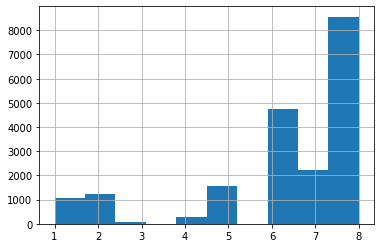

In [41]:
Test_Submission.Response.hist()

In [43]:
Test_Submission.to_csv(r'../Submissions/Z_RF_Submission1.csv', index=False, header=True)

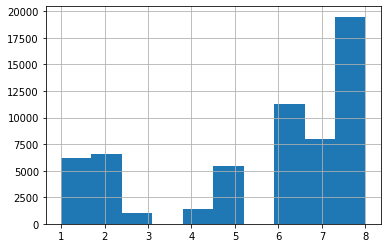

In [42]:
data.Response.hist()